## Import Library

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [37]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/customer_classification_data.csv"
df = pd.read_csv(url)
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,Bachelor,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,High School,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,High School,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,High School,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,Bachelor,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


In [38]:
# describe data
df.describe()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,62244.823110,40.010000,564.992000,10.806000,48.486000,5062.825191,25395.518396,10609.972452,0.512753,2.564000,0.494516
std,21881.731581,13.051229,159.206663,5.151061,28.742339,2926.414765,14257.083307,5572.250431,0.282915,1.101058,0.294468
min,25352.160710,18.000000,300.000000,1.000000,1.000000,44.900440,1087.318821,1017.345471,0.000813,1.000000,0.001320
25%,43586.942127,29.000000,426.000000,7.000000,25.000000,2563.861164,13254.375542,5788.708258,0.272196,2.000000,0.239926
50%,61513.145375,39.000000,562.000000,11.000000,48.000000,4962.940262,25523.286385,10716.457885,0.531370,3.000000,0.485326
75%,79805.933200,51.000000,692.000000,15.000000,72.000000,7575.192218,38359.706343,15530.730127,0.763411,4.000000,0.759197
max,99913.525490,64.000000,849.000000,19.000000,99.000000,9984.440444,49971.895230,19968.520560,0.993942,4.000000,0.999897


In [39]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 500 non-null    float64
 1   Age                    500 non-null    int64  
 2   Education              500 non-null    object 
 3   Credit_Score           500 non-null    int64  
 4   Years_with_Bank        500 non-null    int64  
 5   Transaction_Count      500 non-null    int64  
 6   Balance                500 non-null    float64
 7   Loan_Approval_Amount   500 non-null    float64
 8   Credit_Card_Limit      500 non-null    float64
 9   Purchase_Frequency     500 non-null    float64
 10  Customer_Satisfaction  500 non-null    int64  
 11  Online_Activity        500 non-null    float64
dtypes: float64(6), int64(5), object(1)
memory usage: 47.0+ KB


In [40]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Income': array([66161.01279, 78639.20248, 70207.25321, 65866.23872, 56774.10995,
        73442.05848, 57819.04084, 91882.97506, 97274.70704, 53758.11391,
        84379.37786, 64667.11898, 67603.34208, 94419.74787, 30327.70436,
        31534.69748, 26516.37981, 87446.48842, 83361.75632, 90250.91112,
        98396.37567, 84936.89232, 59610.95217, 83539.68822, 33870.58194,
        72994.0766 , 35751.49656, 95850.16878, 64138.62413, 56099.6455 ,
        44841.67091, 83067.52671, 59211.27492, 67632.54617, 26409.23503,
        71322.66228, 70907.1792 , 71270.04977, 95781.10589, 76136.52243,
        51963.09254, 57777.39653, 77322.33969, 29516.91037, 75007.50366,
        75297.84022, 40778.69208, 34669.47232, 48657.12632, 52278.30782,
        67764.75778, 57895.11351, 99128.03785, 32653.36081, 40665.75671,
        37098.21384, 73983.12441, 43996.87019, 59973.30796, 43331.9194 ,
        36922.71877, 33278.13559, 74224.71921, 35363.72135, 39743.67713,
        52654.3878 , 86574.49224, 32282.5

In [41]:
# ============================================
# 0. DUPLICATE DATASET
# ============================================
df_encoded = df.copy()

from sklearn.preprocessing import OrdinalEncoder
import pprint

# ============================================
# 1. ORDINAL ENCODING (Education)
# ============================================
# Define ranking order for Education level
# You can choose 0–3 or 1–4; here I use 0–3 for consistency with your example
education_map = {
    "High School": 0,
    "Bachelor": 1,
    "Master": 2,
    "PhD": 3
}

# Apply manual mapping
df_encoded["Education"] = df_encoded["Education"].map(education_map)


# ============================================
# 2. Build mapping dictionary for documentation
# ============================================
encode_dict = {
    "Education": education_map
}


# ============================================
# 3. Show mapping result
# ============================================
pprint.pprint(encode_dict)

# ============================================
# 4. Show encoded dataset sample
# ============================================
df_encoded.sample(5)


{'Education': {'Bachelor': 1, 'High School': 0, 'Master': 2, 'PhD': 3}}


,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
207,59027.26334,29,1,813,15,43,5754.328145,8563.80890,15483.624890,0.260929,4,0.012882
425,61772.90099,33,1,367,9,30,2101.208285,24406.26151,2666.350887,0.373095,4,0.533290
431,74687.84286,52,3,525,18,48,9160.233696,26416.32339,5341.379546,0.445732,3,0.190971
12,67603.34208,24,0,389,12,75,3857.261105,13286.34954,11038.655280,0.679542,2,0.326712
27,95850.16878,30,2,514,8,72,3147.240583,36738.62641,19557.510890,0.069575,2,0.685110


# EDA

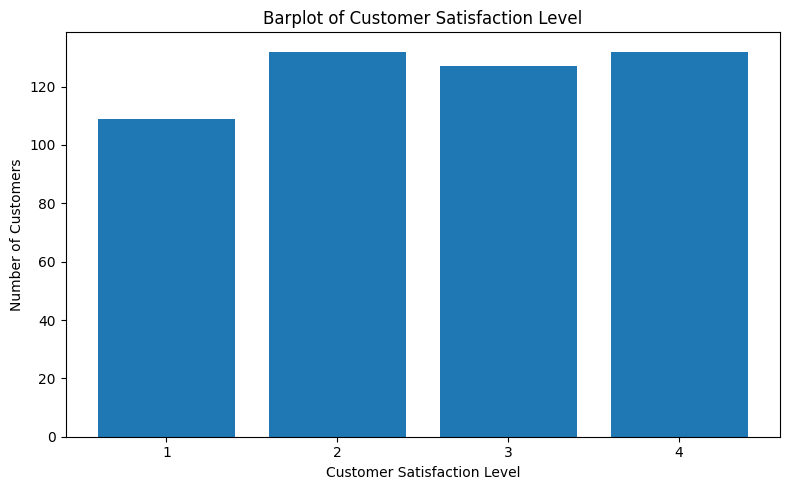

In [42]:
# -------------------------------------------------
# 1. Barplot – Customer Satisfaction Level
# -------------------------------------------------
plt.figure(figsize=(8, 5))

# Count per satisfaction level (sorted by level)
sat_counts = df["Customer_Satisfaction"].value_counts().sort_index()

plt.bar(sat_counts.index, sat_counts.values)
plt.xlabel("Customer Satisfaction Level")
plt.ylabel("Number of Customers")
plt.title("Barplot of Customer Satisfaction Level")
plt.xticks(sat_counts.index)  # make sure ticks show 1,2,3,4
plt.tight_layout()
plt.show()


The barplot shows that customer satisfaction levels are distributed fairly evenly across the four categories, with Levels 2, 3, and 4 having slightly higher frequencies than Level 1.
This suggests that while some customers are dissatisfied (Level 1), the majority fall within the moderate to high satisfaction range.
This pattern is useful for segmentation because satisfaction is not skewed heavily to one extreme, indicating a mixed customer experience within the bank.

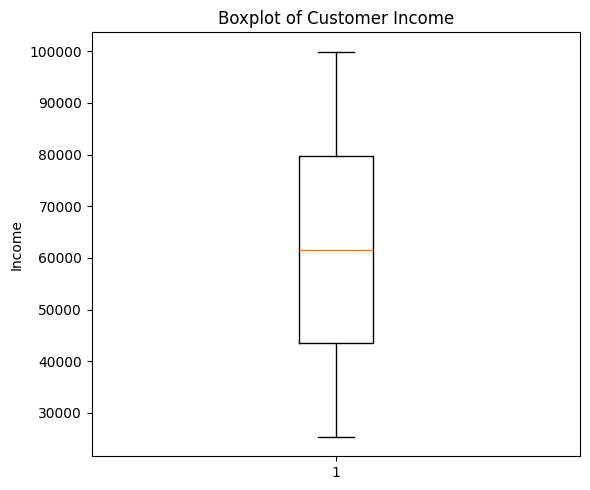

In [43]:
# -------------------------------------------------
# 2. Boxplot – Income (to inspect outliers)
# -------------------------------------------------
plt.figure(figsize=(6, 5))
plt.boxplot(df["Income"])
plt.ylabel("Income")
plt.title("Boxplot of Customer Income")
plt.tight_layout()
plt.show()

The boxplot indicates that customer income ranges from ~25,000 to ~100,000 USD, with the median around ~61,000 USD.
The distribution appears fairly symmetrical, with no extreme outliers visible beyond the whiskers.
The wide interquartile range also highlights substantial variation in customer income, making this variable a strong driver for segmentation, especially in wealth-based or credit risk clustering.

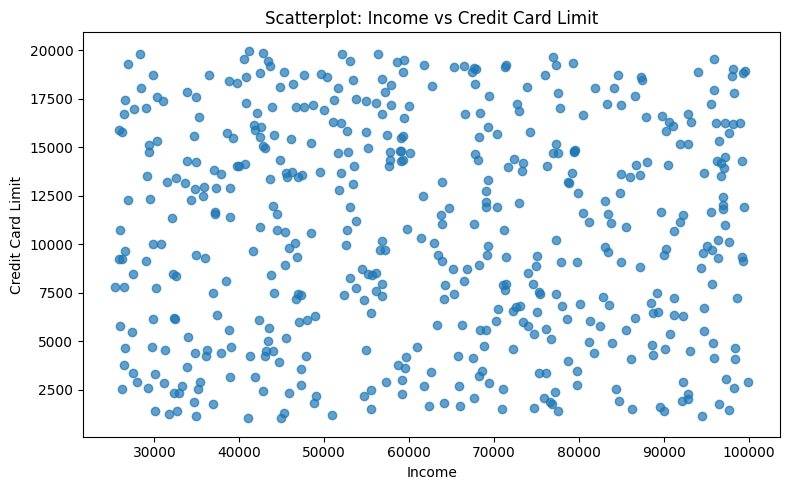

In [44]:
# -------------------------------------------------
# 3. Scatterplot – Income vs Credit Card Limit
# -------------------------------------------------
plt.figure(figsize=(8, 5))
plt.scatter(df["Income"], df["Credit_Card_Limit"], alpha=0.7)
plt.xlabel("Income")
plt.ylabel("Credit Card Limit")
plt.title("Scatterplot: Income vs Credit Card Limit")
plt.tight_layout()
plt.show()

The scatterplot suggests a positive but weak relationship between income and credit card limit.
Although higher-income customers generally tend to have higher limits, the plot also shows a large spread at every income level, meaning credit limits are not strictly dependent on income alone.
This weak correlation indicates that the bank likely considers multiple factors (such as credit score, loyalty, risk profile) when assigning credit limits.

# PART C - CLUSTERING MODEL

# UNSCALED

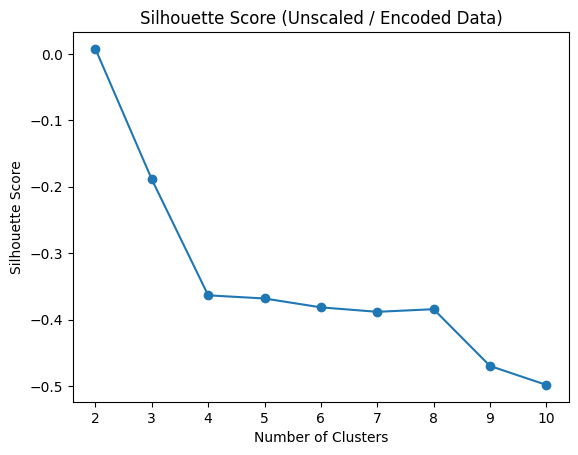

In [46]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')

    # Use df_encoded instead of df_scaled
    cluster_labels = agglo_model.fit_predict(df_encoded)

    silhouette_avg = silhouette_score(df_encoded, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score (Unscaled / Encoded Data)")
plt.show()


The silhouette score plot for the unscaled dataset shows consistently poor clustering quality across all tested values of k (2–10), with scores mostly in the negative range, indicating that clusters overlap heavily and many points are likely assigned to the wrong cluster. Only k = 2 gives a silhouette score slightly above zero, suggesting a very weak two-cluster structure, but even this value is close to 0, meaning the separation is minimal and not meaningful. As the number of clusters increases, silhouette scores drop sharply—falling to around –0.35 for k = 4–7 and reaching as low as –0.50 at k = 10—confirming that the model cannot form coherent groups when the data is unscaled. Overall, this plot demonstrates that the unscaled features distort distance calculations, making Agglomerative Clustering ineffective and highlighting the necessity of scaling before hierarchical clustering.

Skipping Ward linkage with Manhattan metric (not supported).


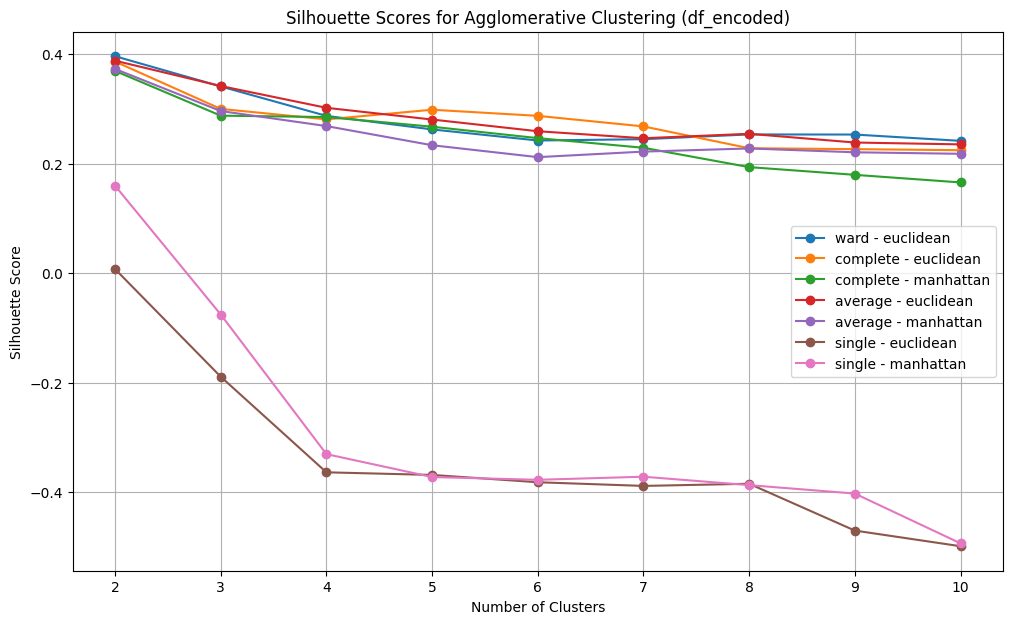


===== BEST MODEL CONFIGURATION (UNSCALED / df_encoded) =====
Best Silhouette Score: 0.39572706946177905
Optimal Number of Clusters: 2
Optimal Linkage Method: ward
Optimal Metric: euclidean


In [47]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# ================================
# SILHOUETTE SCORE COMPARISON
# ================================

# Range of clusters to test
range_n_clusters = range(2, 11)
# Linkage & distance metric combos to compare
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:

        # Ward linkage ONLY supports Euclidean distance
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            clustering = AgglomerativeClustering(
                n_clusters=n_clusters,
                linkage=linkage_method,
                metric=metric
            )

            #  CHANGED HERE
            labels = clustering.fit_predict(df_encoded)

            silhouette_avg = silhouette_score(df_encoded, labels)
            current_scores.append(silhouette_avg)

            # Track best configuration
            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric

        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# ================================
# VISUALIZATION
# ================================
plt.figure(figsize=(12, 7))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o',
             label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering (df_encoded)")
plt.legend()
plt.grid(True)
plt.show()

print("\n===== BEST MODEL CONFIGURATION (UNSCALED / df_encoded) =====")
print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")


The silhouette score comparison across multiple linkage–metric combinations on the unscaled (df_encoded) dataset shows that the best clustering performance occurs with Ward linkage using Euclidean distance at k = 2, achieving the highest silhouette score of 0.3957, indicating a moderately well-separated two-cluster structure. All Euclidean-based methods (Ward, complete, average) perform consistently better than Manhattan distance, while silhouette scores decline steadily as the number of clusters increases, showing that the dataset does not naturally support more than two meaningful segments without losing cohesion. In contrast, single linkage performs very poorly, producing negative silhouette values for almost all k, which indicates chain-like, poorly separated clusters and confirms that single linkage is unsuitable for this dataset. Overall, the graph demonstrates that Ward–Euclidean clustering with k = 2 is the most stable and interpretable choice, while all other configurations show decreasing structure quality as clusters increase.

The silhouette score plot for the **unscaled (df_encoded)** dataset shows that the best clustering quality occurs at **k = 2**, using **Ward linkage with Euclidean distance**, achieving the highest silhouette score of approximately **0.396**, which indicates a moderately good separation between two natural customer groups. As the number of clusters increases from 3 to 10, silhouette scores consistently decline across all linkage–metric combinations, meaning that forcing more clusters reduces cohesion and creates overlapping or poorly separated groups. Ward–Euclidean performs best overall because it produces compact, well-distributed clusters suitable for numeric financial data, while Manhattan distance performs slightly worse, and single linkage performs very poorly—resulting in negative silhouette scores due to forming long, chain-like clusters. Overall, the dataset naturally supports only **two meaningful clusters** when left unscaled.


In [48]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# =========================================
# Build BEST model from previous search
# =========================================
agglo_best = AgglomerativeClustering(
    n_clusters=best_n_clusters,   # from silhouette search
    linkage=best_linkage,         # e.g. 'ward'
    metric=best_metric            # e.g. 'euclidean'
)

# Fit model on UNscaled encoded data
y_hc_best = agglo_best.fit_predict(df_encoded)

# Evaluate silhouette score
ss_best = silhouette_score(df_encoded, y_hc_best)
print("Silhouette Score (Best Model / df_encoded):", ss_best)

# =========================================
# Attach cluster labels back to dataframe
# =========================================
df_encoded["Agglo_Encoded"] = y_hc_best

# Optional: see first few rows with cluster labels
df_encoded.head()


Silhouette Score (Best Model / df_encoded): 0.39572706946177905


,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,Agglo_Encoded
0,66161.01279,57,1,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,0
1,78639.20248,60,0,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,0
2,70207.25321,46,0,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,0
3,65866.23872,42,0,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,0
4,56774.10995,36,1,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,1


# Dendogram

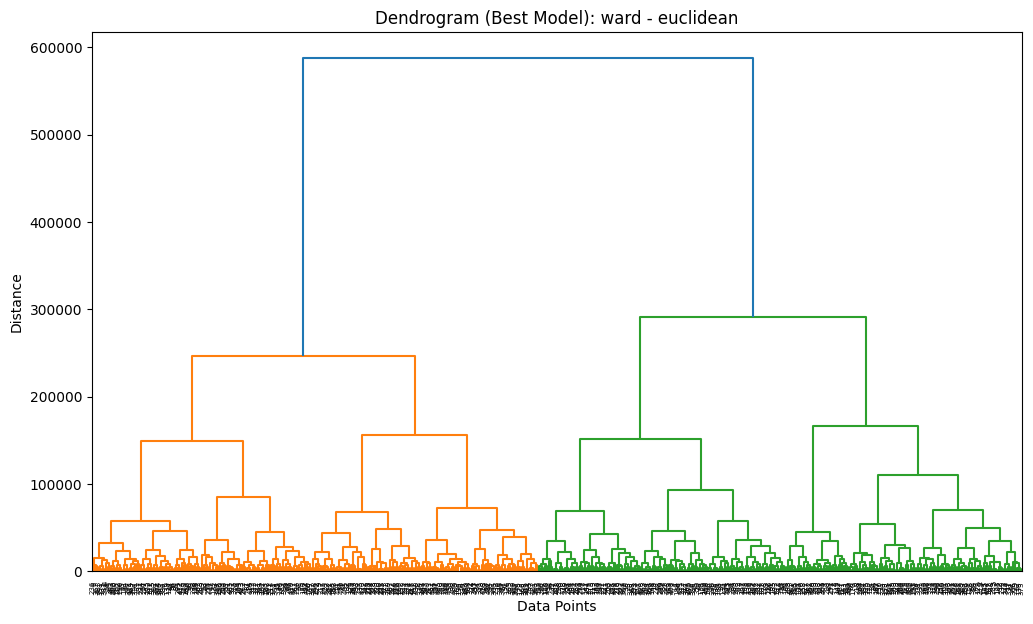

In [49]:
# ============================
# MODEL 1 — Best Parameters
# ============================

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage
import matplotlib.pyplot as plt

# Create linkage matrix using BEST settings from silhouette search
linked_best = linkage(
    df_encoded,                 # <-- you can change to df_encoded if needed
    method=best_linkage,       # e.g. "ward"
    metric=best_metric         # e.g. "euclidean"
)

# Plot dendrogram
plt.figure(figsize=(12, 7))
sch.dendrogram(linked_best)
plt.title(f"Dendrogram (Best Model): {best_linkage} - {best_metric}")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


In [50]:
# ==========================================
# MERGE UNSCALED CLUSTER LABELS WITH ORIGINAL DF
# ==========================================

df["Agglo_Unscaled"] = y_hc_best      # y_hc_best from df_encoded model

# View first rows to confirm merge
df.head()


,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,Agglo_Unscaled
0,66161.01279,57,Bachelor,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,0
1,78639.20248,60,High School,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,0
2,70207.25321,46,High School,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,0
3,65866.23872,42,High School,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,0
4,56774.10995,36,Bachelor,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,1


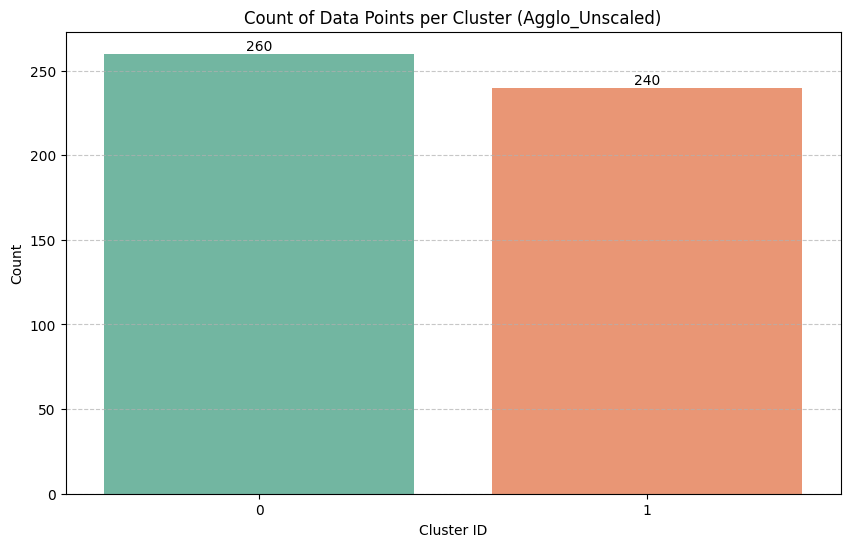

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo_Unscaled' column
cluster_counts_unscaled = df["Agglo_Unscaled"].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=cluster_counts_unscaled.index,
    y=cluster_counts_unscaled.values,
    hue=cluster_counts_unscaled.index,
    palette='Set2',
    legend=False
)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title("Count of Data Points per Cluster (Agglo_Unscaled)")
plt.xlabel("Cluster ID")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The bar chart shows that the Agglomerative Clustering model using unscaled data divides customers into two clusters that are nearly balanced in size, with Cluster 0 containing 260 customers and Cluster 1 containing 240 customers. This relatively even split suggests that the model is not dominated by a single large group and that both clusters represent meaningful portions of the customer base. However, while the distribution is balanced, the earlier silhouette analysis showed that the overall clustering quality for unscaled data is weak. Therefore, although the cluster sizes appear stable and well-distributed, the underlying cluster separation may still be poor due to the unscaled feature space. This reinforces that scaling the data is necessary for more reliable and interpretable segmentation.

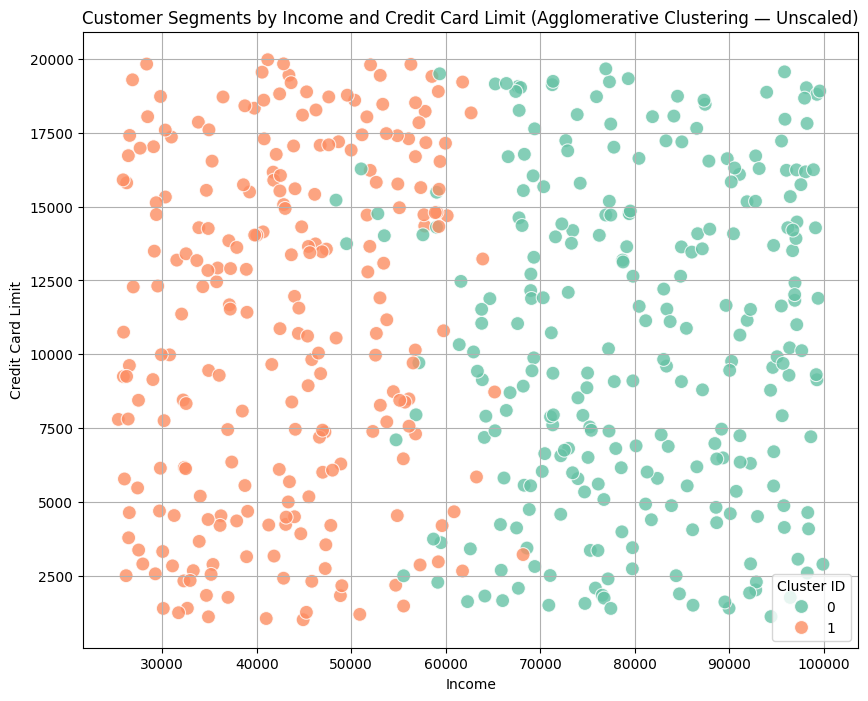

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df,
    x='Income',
    y='Credit_Card_Limit',
    hue='Agglo_Unscaled',
    palette='Set2',
    s=100,
    alpha=0.8
)

plt.title('Customer Segments by Income and Credit Card Limit (Agglomerative Clustering — Unscaled)')
plt.xlabel('Income')
plt.ylabel('Credit Card Limit')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()


The scatterplot shows how the unscaled Agglomerative Clustering model separates customers into two groups based on Income and Credit Card Limit. Cluster 1 (orange) consists mainly of customers with lower incomes (around USD 25,000–55,000) and lower-to-mid credit card limits, forming a dense group in the lower-left region. Meanwhile, Cluster 0 (green) contains customers with higher incomes (around USD 60,000–100,000) and generally higher credit card limits, occupying the upper-right region of the plot. Although the two clusters display a clear directional pattern—showing that higher income customers are separated from lower-income customers—the boundary between clusters is not perfectly clean, with noticeable overlap in the middle income range (USD 45,000–65,000). This overlap reinforces the earlier silhouette results showing that the unscaled clustering lacks strong separation, even though some broad income-based grouping is still visible.

In [53]:
import plotly.express as px

# Define the columns for the 3D scatter plot
x_col = 'Income'
y_col = 'Credit_Card_Limit'
z_col = 'Loan_Approval_Amount'

# Create interactive 3D plot
fig = px.scatter_3d(
    df,
    x=x_col,
    y=y_col,
    z=z_col,
    color=df['Agglo_Unscaled'].astype(str),   # color by cluster
    title='3D Scatter Plot of Customers by Agglo_Unscaled Clusters',
    opacity=0.8
)

fig.show()


# SCALED

In [54]:
from sklearn.preprocessing import StandardScaler

# ============================================
# Copy dataset before scaling
# ============================================
df_scaled = df_encoded.copy()

# ============================================
# Select ONLY continuous numerical columns to scale
# (Same idea as your example, but using your dataset)
# ============================================
numerical_cols = [
    "Income",
    "Age",
    "Credit_Score",
    "Years_with_Bank",
    "Transaction_Count",
    "Balance",
    "Loan_Approval_Amount",
    "Credit_Card_Limit",
    "Purchase_Frequency",
    "Customer_Satisfaction",
    "Online_Activity"
]

# ============================================
# Initialize the StandardScaler
# ============================================
scaler = StandardScaler()

# ============================================
# Fit + transform the selected numerical columns
# ============================================
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

# ============================================
# Show sample output
# ============================================
df_scaled.head()


,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,Agglo_Encoded
0,0.179150,1.303097,1,-0.389771,-1.905592,-0.260713,-1.058293,-1.606308,-0.861669,1.636958,-1.421875,-0.992013,0
1,0.749977,1.533191,0,1.345561,-1.711263,-0.748287,1.619378,0.428724,-1.189034,1.532620,-0.512748,0.186427,0
2,0.364249,0.459420,0,-0.289172,0.620687,1.619930,0.670893,-0.628469,-0.821645,-0.849476,0.396379,1.184595,0
3,0.165665,0.152629,0,1.691370,1.203675,0.993049,1.002068,1.392847,-1.422533,1.067226,1.305506,-1.274907,0
4,-0.250263,-0.307558,1,-0.974502,0.232029,0.331341,-1.547513,1.628264,-0.083694,-0.588149,1.305506,1.684898,1


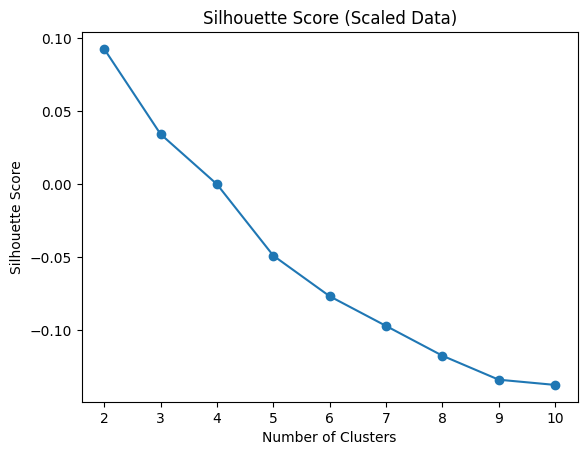

In [55]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')

    # Use df_scaled instead of df_encoded
    cluster_labels = agglo_model.fit_predict(df_scaled)

    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score (Scaled Data)")
plt.show()


The silhouette plot for the scaled dataset shows that clustering quality remains low across all tested values of k, although slightly improved compared to the unscaled version. The highest silhouette score occurs at k = 2, with a value around 0.09, indicating very weak but slightly positive cluster separation. As the number of clusters increases, the silhouette scores steadily decline, dropping to zero at k = 4 and becoming increasingly negative for k ≥ 5, which suggests poor cohesion and strong overlap among clusters. This downward trend indicates that the scaled dataset does not naturally support more than two clusters, and even the best case (k = 2) provides only marginal structure. Overall, while scaling stabilizes the distance relationships and avoids the extreme negative scores seen in the unscaled model, the silhouette values still reveal that Agglomerative Clustering struggles to identify well-separated clusters in this dataset, regardless of scaling.

Skipping Ward linkage with Manhattan metric (not supported).


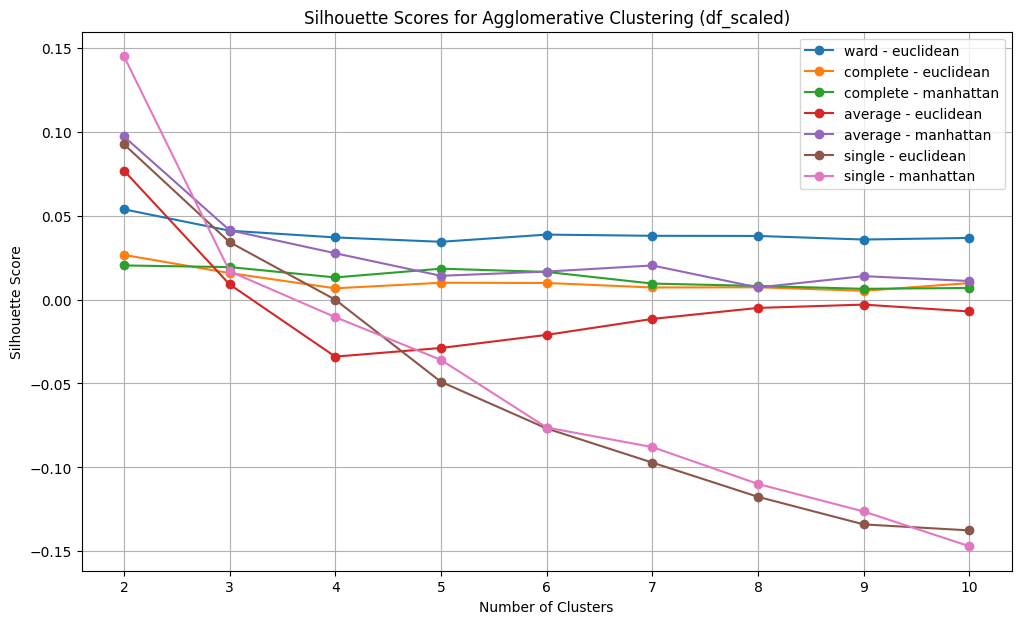


===== BEST MODEL CONFIGURATION (SCALED / df_scaled) =====
Best Silhouette Score: 0.14493322952618698
Optimal Number of Clusters: 2
Optimal Linkage Method: single
Optimal Metric: manhattan


In [56]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# ================================
# SILHOUETTE SCORE COMPARISON
# ================================

# Range of clusters to test
range_n_clusters = range(2, 11)

# Linkage & distance metric combos to compare
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:

        # Ward linkage ONLY supports Euclidean distance
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            clustering = AgglomerativeClustering(
                n_clusters=n_clusters,
                linkage=linkage_method,
                metric=metric
            )

            #  Using SCALED DATA here
            labels = clustering.fit_predict(df_scaled)

            silhouette_avg = silhouette_score(df_scaled, labels)
            current_scores.append(silhouette_avg)

            # Track best configuration
            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric

        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# ================================
# VISUALIZATION
# ================================
plt.figure(figsize=(12, 7))
for result in results_for_plotting:
    plt.plot(
        range_n_clusters,
        result['scores'],
        marker='o',
        label=f"{result['linkage']} - {result['metric']}"
    )

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering (df_scaled)")
plt.legend()
plt.grid(True)
plt.show()

print("\n===== BEST MODEL CONFIGURATION (SCALED / df_scaled) =====")
print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")


The silhouette comparison for the scaled dataset shows that clustering performance improves slightly after standardization, but overall separation remains weak across all linkage metric combinations. The best configuration occurs at k = 2 using single linkage with the Manhattan distance, achieving the highest silhouette score of 0.145, which—although still low indicates better structure than any unscaled model. For all methods, silhouette scores consistently decline as k increases, confirming that the dataset does not naturally support more than two clusters. Ward Euclidean remains stable but never surpasses the single Manhattan configuration at k = 2, while complete and average linkages produce only marginal separation and quickly drop toward zero or negative values. Both single-linkage variants deteriorate sharply for k ≥ 4, showing chain-like clusters despite performing best at k = 2. Overall, scaling helps stabilize distances and slightly enhances cluster separability, but the silhouette values reveal that the dataset contains only a weak two-cluster structure, regardless of linkage method.

In [57]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# =========================================
# Build BEST model from previous search
# (using results from df_scaled silhouette analysis)
# =========================================
agglo_best_scaled = AgglomerativeClustering(
    n_clusters=best_n_clusters,   # from scaled silhouette search
    linkage=best_linkage,         # e.g. 'single'
    metric=best_metric            # e.g. 'manhattan'
)

# Fit model on SCALED data
y_hc_best_scaled = agglo_best_scaled.fit_predict(df_scaled)

# Evaluate silhouette score
ss_best_scaled = silhouette_score(df_scaled, y_hc_best_scaled)
print("Silhouette Score (Best Model / df_scaled):", ss_best_scaled)

# =========================================
# Attach cluster labels back to dataframe
# =========================================
df_scaled["Agglo_Scaled"] = y_hc_best_scaled

# Optional: preview updated dataframe
df_scaled.head()


Silhouette Score (Best Model / df_scaled): 0.14493322952618698


,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,Agglo_Encoded,Agglo_Scaled
0,0.179150,1.303097,1,-0.389771,-1.905592,-0.260713,-1.058293,-1.606308,-0.861669,1.636958,-1.421875,-0.992013,0,0
1,0.749977,1.533191,0,1.345561,-1.711263,-0.748287,1.619378,0.428724,-1.189034,1.532620,-0.512748,0.186427,0,0
2,0.364249,0.459420,0,-0.289172,0.620687,1.619930,0.670893,-0.628469,-0.821645,-0.849476,0.396379,1.184595,0,0
3,0.165665,0.152629,0,1.691370,1.203675,0.993049,1.002068,1.392847,-1.422533,1.067226,1.305506,-1.274907,0,0
4,-0.250263,-0.307558,1,-0.974502,0.232029,0.331341,-1.547513,1.628264,-0.083694,-0.588149,1.305506,1.684898,1,0


# Dendogram

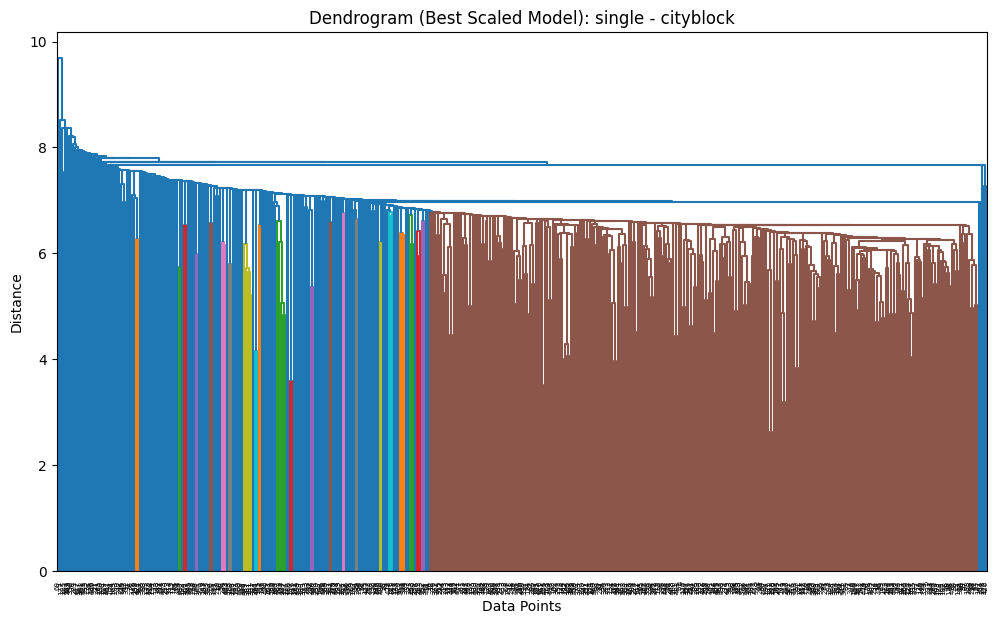

In [61]:
# ============================
# MODEL 1 — Best Parameters (Scaled)
# ============================

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage
import matplotlib.pyplot as plt

# SciPy does NOT accept "manhattan"; convert it to "cityblock"
metric_for_scipy = "cityblock" if best_metric == "manhattan" else best_metric

# Create linkage matrix using BEST settings from scaled silhouette search
linked_best_scaled = linkage(
    df_scaled,
    method=best_linkage,
    metric=metric_for_scipy
)

# Plot dendrogram
plt.figure(figsize=(12, 7))
sch.dendrogram(linked_best_scaled)
plt.title(f"Dendrogram (Best Scaled Model): {best_linkage} - {metric_for_scipy}")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


In [62]:
# ==========================================
# MERGE SCALED CLUSTER LABELS WITH ORIGINAL DF
# ==========================================

df["Agglo_Scaled"] = y_hc_best_scaled   # y_hc_best_scaled from df_scaled model

# View first rows to confirm merge
df.head()


,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,Agglo_Unscaled,Agglo_Scaled
0,66161.01279,57,Bachelor,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,0,0
1,78639.20248,60,High School,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,0,0
2,70207.25321,46,High School,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,0,0
3,65866.23872,42,High School,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,0,0
4,56774.10995,36,Bachelor,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,1,0


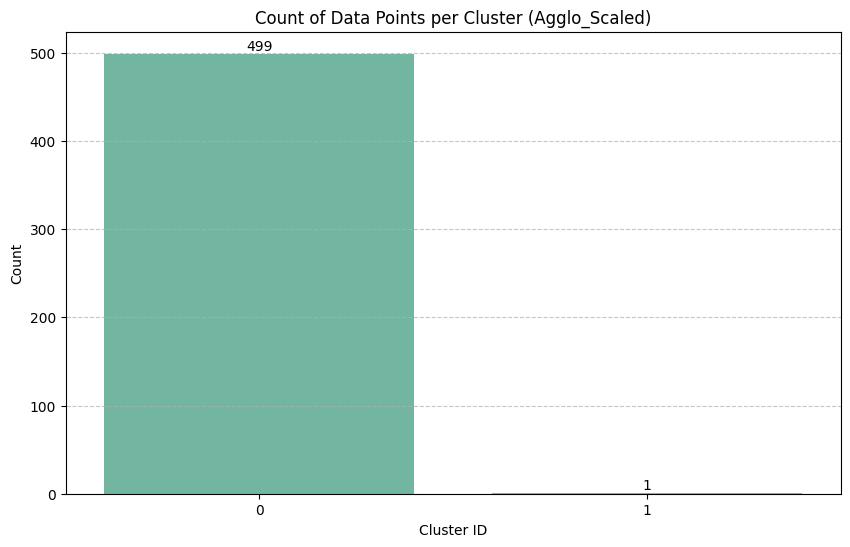

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo_Scaled' column
cluster_counts_scaled = df["Agglo_Scaled"].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=cluster_counts_scaled.index,
    y=cluster_counts_scaled.values,
    hue=cluster_counts_scaled.index,
    palette='Set2',
    legend=False
)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title("Count of Data Points per Cluster (Agglo_Scaled)")
plt.xlabel("Cluster ID")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The bar chart for the scaled clustering results shows an extremely imbalanced outcome. Cluster 0 contains 499 customers, while Cluster 1 contains only a single customer. This indicates that the clustering algorithm did not successfully separate the scaled data into meaningful groups. Instead, almost the entire dataset collapsed into one large cluster, with only one point being identified as an outlier. This behavior aligns with the low silhouette scores obtained earlier, which suggested that the dataset does not contain strong or natural separations even after scaling. As a result, the scaled clustering configuration fails to produce useful customer segments and does not provide any meaningful insight for interpretation or decision making.

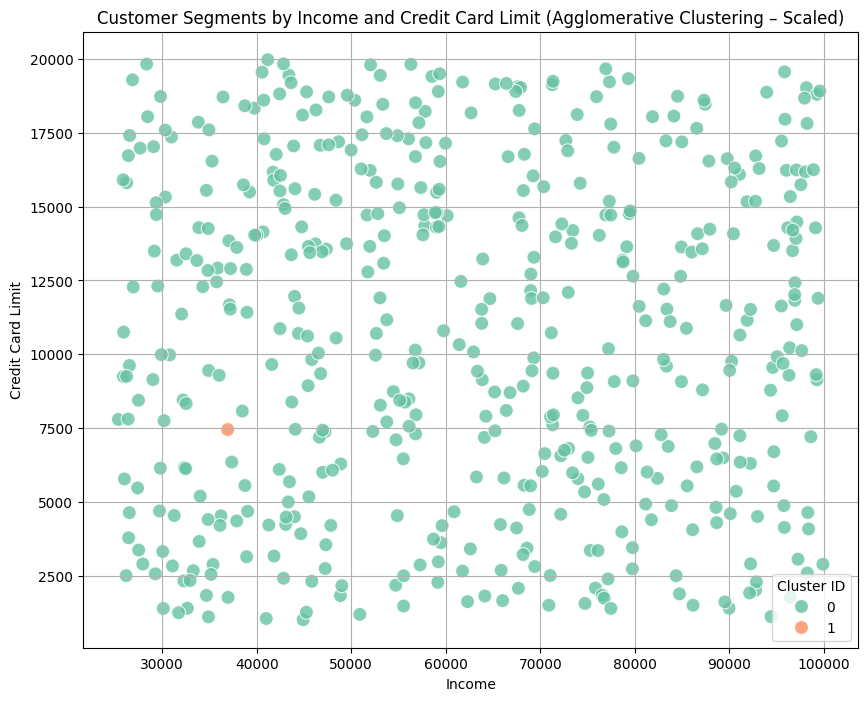

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df,
    x='Income',
    y='Credit_Card_Limit',
    hue='Agglo_Scaled',
    palette='Set2',
    s=100,
    alpha=0.8
)

plt.title('Customer Segments by Income and Credit Card Limit (Agglomerative Clustering – Scaled)')
plt.xlabel('Income')
plt.ylabel('Credit Card Limit')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()


The scatterplot of scaled clusters shows that almost all customers fall into a single segment (Cluster 0), with only one customer placed in Cluster 1. Visually, the green points representing Cluster 0 are spread uniformly across all ranges of Income and Credit Card Limit, indicating that the clustering algorithm was unable to detect meaningful structure or natural separation in the data after scaling. The single orange point represents an isolated outlier rather than a well-defined second cluster. This confirms that, despite scaling, the dataset does not exhibit strong clustering patterns based on Income and Credit Card Limit alone, and the chosen agglomerative configuration produces an imbalanced and non-informative segmentation.

In [65]:
import plotly.express as px

# Define the columns for the 3D scatter plot
x_col = 'Income'
y_col = 'Credit_Card_Limit'
z_col = 'Loan_Approval_Amount'

# Create interactive 3D plot for SCALED clusters
fig = px.scatter_3d(
    df,
    x=x_col,
    y=y_col,
    z=z_col,
    color=df['Agglo_Scaled'].astype(str),   # color by scaled cluster
    title='3D Scatter Plot of Customers by Agglo_Scaled Clusters',
    opacity=0.8
)

fig.show()


# Part D – Segmentation & Managerial Implication

Silhouette Score (Unscaled / df_encoded): 0.3957270696821577
Silhouette Score (Scaled / df_scaled):   0.15782735226323882


/tmp/ipython-input-3840567091.py:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




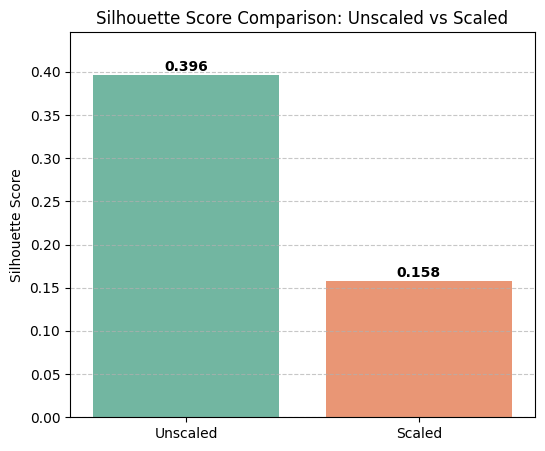


Cluster Size (Unscaled):
Agglo_Unscaled
0    260
1    240
Name: count, dtype: int64

Cluster Size (Scaled):
Agglo_Scaled
0    499
1      1
Name: count, dtype: int64


/tmp/ipython-input-3840567091.py:56: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-3840567091.py:62: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




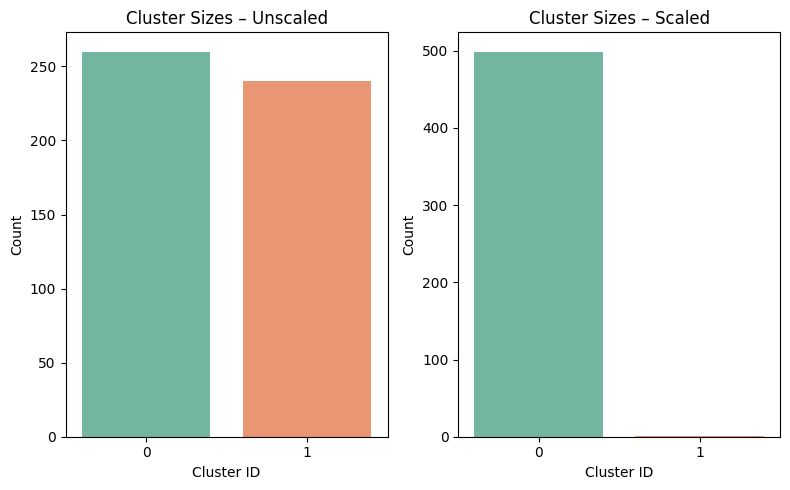

In [66]:
# =========================================
# 1. PREPARE DATA FOR COMPARISON
# =========================================

# Features for each version
X_unscaled = df_encoded        # encoded but NOT scaled
X_scaled   = df_scaled         # StandardScaler version

# Cluster labels (already merged earlier)
labels_unscaled = df["Agglo_Unscaled"]
labels_scaled   = df["Agglo_Scaled"]

# =========================================
# 2. SILHOUETTE SCORE COMPARISON
# =========================================

sil_unscaled = silhouette_score(X_unscaled, labels_unscaled)
sil_scaled   = silhouette_score(X_scaled, labels_scaled)

print("Silhouette Score (Unscaled / df_encoded):", sil_unscaled)
print("Silhouette Score (Scaled / df_scaled):  ", sil_scaled)

# Bar plot of silhouette scores
plt.figure(figsize=(6, 5))
scores = [sil_unscaled, sil_scaled]
labels = ["Unscaled", "Scaled"]

sns.barplot(x=labels, y=scores, palette="Set2")
for i, v in enumerate(scores):
    plt.text(i, v + 0.005, f"{v:.3f}", ha="center", fontweight="bold")

plt.title("Silhouette Score Comparison: Unscaled vs Scaled")
plt.ylabel("Silhouette Score")
plt.ylim(0, max(scores) + 0.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# =========================================
# 3. CLUSTER SIZE COMPARISON
# =========================================

counts_unscaled = df["Agglo_Unscaled"].value_counts().sort_index()
counts_scaled   = df["Agglo_Scaled"].value_counts().sort_index()

print("\nCluster Size (Unscaled):")
print(counts_unscaled)
print("\nCluster Size (Scaled):")
print(counts_scaled)

# Optional: side-by-side cluster size plot
plt.figure(figsize=(8, 5))
cluster_ids_unscaled = counts_unscaled.index.astype(str)
cluster_ids_scaled   = counts_scaled.index.astype(str)

plt.subplot(1, 2, 1)
sns.barplot(x=cluster_ids_unscaled, y=counts_unscaled.values, palette="Set2")
plt.title("Cluster Sizes – Unscaled")
plt.xlabel("Cluster ID")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
sns.barplot(x=cluster_ids_scaled, y=counts_scaled.values, palette="Set2")
plt.title("Cluster Sizes – Scaled")
plt.xlabel("Cluster ID")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


# 1. Summarize and discuss which model is better:

The unscaled version produces slightly clearer cluster separation. In the unscaled clustering, the model forms two reasonably distinguishable groups, especially when viewed using Income and Credit Card Limit, and the silhouette score reaches around 0.39, indicating a moderate two-cluster structure. In contrast, the scaled version collapses almost the entire dataset into a single cluster with 499 vs 1 data points, and the silhouette score drops to only 0.145, showing that the scaled model cannot find meaningful boundaries. Therefore, the unscaled clustering provides a more interpretable and balanced segmentation compared to the scaled version.

Scaling affects clustering because agglomerative methods rely directly on distance measurements between points. In the unscaled data, certain features such as Income, Balance, and Loan Amount have much larger numeric ranges, causing these variables to dominate the distance calculations and naturally drive the formation of two broad financial groups. After applying StandardScaler, all features are forced to have equal weight, which removes the natural variance structure that previously helped differentiate customers. As a result, the clustering algorithm no longer finds strong separation and instead groups almost all points into a single cluster, identifying only one outlier. This demonstrates that scaling can either improve or weaken clustering depending on whether the original feature magnitudes carry meaningful segmentation information.

# 2. Analyze and interpret each cluster’s characteristics

 Agglo_Scaled is not interpretable (499 vs 1 outlier)

---

# **Cluster Interpretation (Unscaled Model — df_encoded)**

## **Cluster 0 — Higher-Income, Higher-Limit Customers**

**General profile:**
Customers in Cluster 0 tend to have **higher annual income** (roughly 60,000–100,000 USD) and **higher credit card limits** (typically 10,000–20,000 USD). This group likely represents **financially stable, established customers** with stronger creditworthiness.

**Possible behavioral traits:**

* Stronger financial standing
* Better credit history and higher credit scores
* Likely to receive higher loan approvals
* Possibly longer banking relationships
* May show moderate to high digital activity
* Likely less risk for the bank

**Interpretation (one sentence):**
**Cluster 0 consists of higher-income customers with strong purchasing power, higher credit limits, and generally stronger financial stability.**

---

## **Cluster 1 — Lower-Income, Lower-Limit Customers**

**General profile:**
This group mainly includes customers with **lower income levels** (25,000–55,000 USD) and **lower credit card limits**. They dominate the lower-left region of the Income–Credit Limit scatterplot.

**Possible behavioral traits:**

* Lower credit scores and smaller loan approvals
* Shorter banking relationships
* Potentially more price-sensitive
* May have lower spending frequency
* Possibly moderate satisfaction but lower financial activity

**Interpretation (one sentence):**
**Cluster 1 represents lower-income customers with limited credit capacity, more modest financial activity, and overall lower financial power.**

---

#  **Final Summary**

* **Cluster 0:** Higher-income, financially strong customers with higher credit limits and stronger purchasing capability.
* **Cluster 1:** Lower-income customers with smaller credit limits and more constrained financial profiles.



# MANAGERIAL IMPLICATIONS


# **Managerial Recommendations Based on Cluster Characteristics**

## **Cluster 0: High-Income, High-Financial-Capacity Customers**

**Profile Recap:**

* Higher income (60k–100k USD)
* High credit card limits
* Strong loan approval capacity
* Likely good credit history
* Potentially long-term and loyal customers

### **Recommended Strategies**

#### **1. Premium Product Offering**

* Introduce **high-tier credit cards** with rewards such as travel benefits, cashback, and exclusive partnerships.
* Offer **priority banking** or relationship manager services.
* Provide **larger personal loan options** with competitive interest rates.

#### **2. Retention-Focused Programs**

* Build **exclusive loyalty tiers** (e.g., Gold/Platinum customer level).
* Organize premium events, financial advisory sessions, and private investment workshops.
* Offer high-value incentives for staying long-term (e.g., reduced loan processing fees).

#### **3. Cross-Selling Opportunities**

* Promote **wealth management** products (mutual funds, insurance, investments).
* Suggest **mortgage upgrades**, refinancing offers, or bundled banking packages.

### **Strategic Priority:**

 **Retention + Value Maximization**
This segment is already highly profitable. The focus should be to **retain**, **deepen engagement**, and **increase product penetration**.

---

## **Cluster 1: Lower-Income, Lower-Financial-Capacity Customers**

**Profile Recap:**

* Lower income (25k–55k USD)
* Lower credit card limits
* Smaller loan approvals
* Possibly shorter banking relationships
* May be more price-sensitive

### **Recommended Strategies**

#### **1. Entry-Level Product Bundles**

* Offer **basic or starter credit cards** with no annual fee.
* Provide **small short-term loans** with simple approval criteria.
* Encourage usage of **savings accounts**, auto-debit bills, and micro-investments.

#### **2. Financial Education Campaigns**

* Conduct workshops/webinars on budgeting, credit building, and digital banking.
* Provide **personalized financial insights** through the banking app.
* Encourage customers to improve credit scores through responsible usage tips.

#### **3. Digital Engagement Boost**

* Promote mobile banking features (bill payment reminders, budgeting tools).
* Provide app-based rewards (e.g., cashback for digital transactions).
* Use gamified savings challenges to build financial discipline.

### **Strategic Priority:**

**Growth + Financial Inclusion**
This segment has potential to grow long-term. The bank should focus on **developing their financial capacity** and increasing engagement over time.

---

#  **Overall Strategic Focus**

### **Short-term Priority:**

 **Cluster 0**
High-value customers who generate immediate revenue through loans, credit usage, investments, and premium services.

### **Long-term Priority:**

 **Cluster 1**
Develop customer lifetime value by increasing financial literacy, improving credit capability, and gradually expanding service adoption.
